In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats

import os, sys

project_root = '/user_data/mmhender/featsynth/'
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils
from behav_analysis import analyze_expt1

/home/mmhender/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


#### Load human behav data

In [2]:
super_names, super_cbinds, basic_names, basic_inds, \
        super_names_long, super_inds_long, n_basic, n_super, n_basic_each_super = \
            analyze_expt1.get_categ_info()

trial_data_all, subjects, subject_cb, cue_level_names, image_type_names = analyze_expt1.load_data()
 
n_subjects = len(subjects)
n_cue_levels = len(cue_level_names)
n_image_types = len(image_type_names)

acc_by_supcat, dprime_by_supcat = analyze_expt1.get_perf_by_supercateg()
acc_by_bascat, dprime_by_bascat = analyze_expt1.get_perf_by_basiccateg()
acc_by_bascat_combinesubs, dprime_by_bascat_combinesubs = analyze_expt1.get_perf_by_basiccateg_combinesubjects()

acc_by_condition, dprime_by_condition, propyes_by_condition, rt_by_condition = analyze_expt1.get_perf_by_cond()


In [3]:
intact_acc = np.mean(acc_by_condition[:,:,4], axis=1)
subjects_use = intact_acc>=0.75
assert(np.all(subjects_use))

In [4]:
image_type_names

array(['pool1', 'pool2', 'pool3', 'pool4', 'orig'], dtype=object)

In [5]:
cue_level_names

array(['basic', 'super'], dtype=object)

#### Load image discriminability 

In [6]:
save_dir = os.path.join(project_root, 'features', 'simclr', 'categ_discrim')
fn2load = os.path.join(save_dir, 'categ_discrim_images_expt1.npy')
d = np.load(fn2load, allow_pickle=True).item()
d.keys()

dict_keys(['acc_super_overall', 'dprime_super_overall', 'acc_basic_overall', 'dprime_basic_overall', 'acc_each_supcat', 'acc_each_bascat', 'dprime_each_supcat', 'dprime_each_bascat'])

In [7]:
save_dir = os.path.join(project_root, 'features', 'simclr', 'categ_discrim')
fn2load = os.path.join(save_dir, 'categ_discrim_images_expt1_shuffle.npy')
d_shuff = np.load(fn2load, allow_pickle=True).item()
d_shuff.keys()

dict_keys(['acc_super_overall', 'dprime_super_overall', 'acc_basic_overall', 'dprime_basic_overall', 'acc_each_supcat', 'acc_each_bascat', 'dprime_each_supcat', 'dprime_each_bascat'])

In [8]:
fn2load

'/user_data/mmhender/featsynth/features/simclr/categ_discrim/categ_discrim_images_expt1_shuffle.npy'

In [9]:
save_dir = os.path.join(project_root, 'features', 'simclr', 'categ_discrim')
fn2load = os.path.join(save_dir, 'categ_discrim_images_expt2.npy')
d_gray = np.load(fn2load, allow_pickle=True).item()
d_gray.keys()

dict_keys(['acc_super_overall', 'dprime_super_overall', 'acc_basic_overall', 'dprime_basic_overall', 'acc_each_supcat', 'acc_each_bascat', 'dprime_each_supcat', 'dprime_each_bascat'])

#### Params for plotting

In [10]:
cue_level_colors = np.array([[93,192,219], [44,92,168]])/255
point_types = ['o','x']
markersize = 4;
xjitters = [-0.02, 0.02]

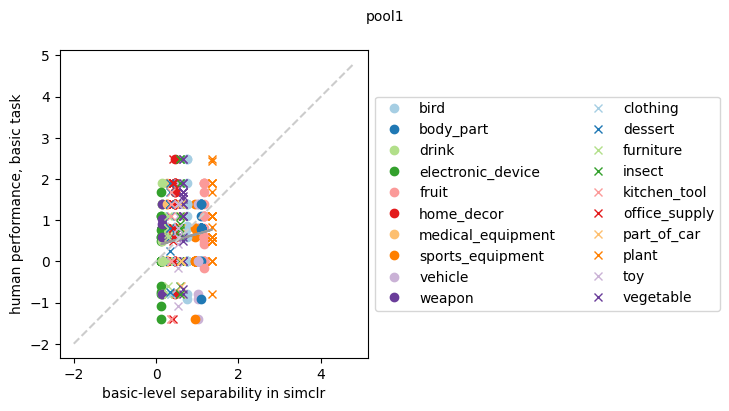

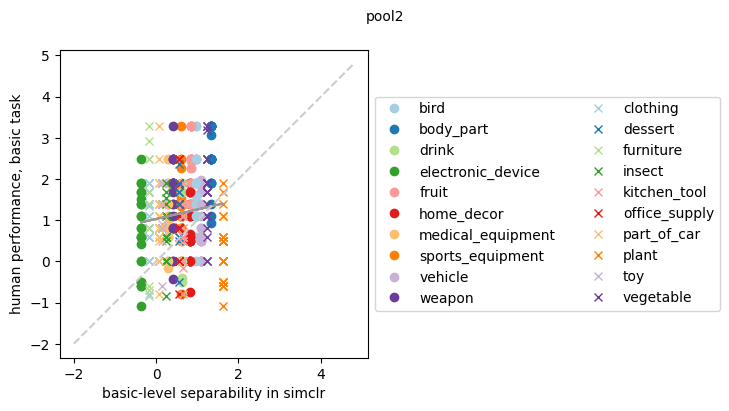

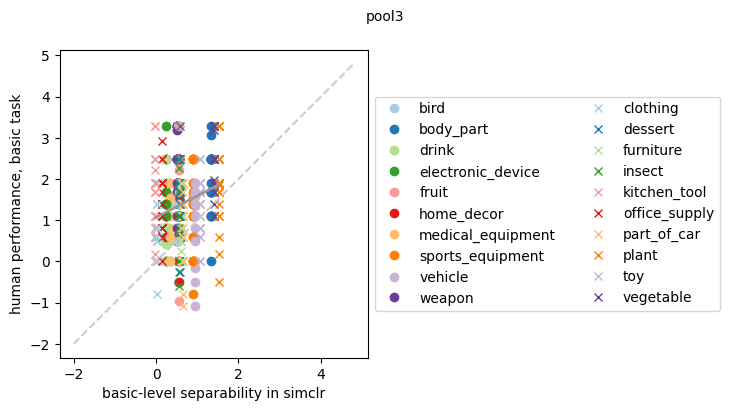

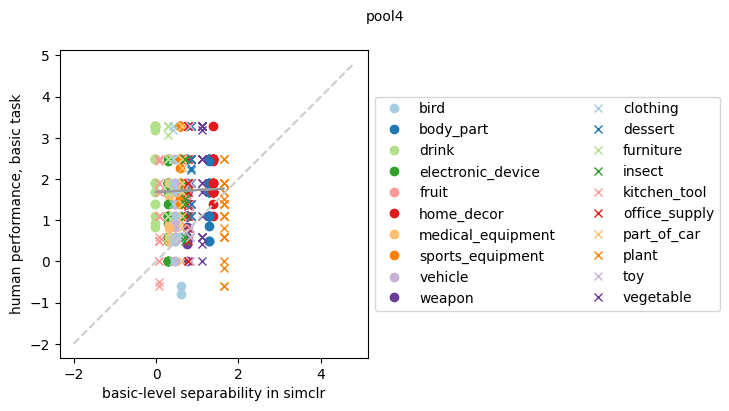

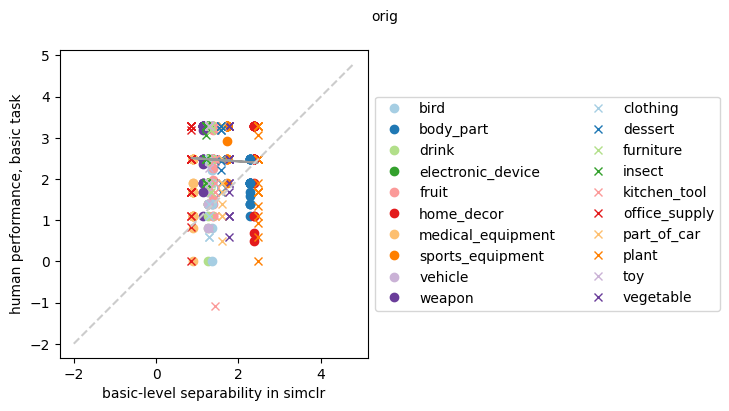

In [21]:
for ii in range(5):
    
    plt.figure(figsize=(12,4))

    lims = [-2, 4.8]

    ax = plt.subplot(1,1,1)

    # pi=0
    
    xvals = []; yvals = []
        
    allh = []
    
    # pi = 1
    for cbi in [0,1]:

        # pi+=1
        
        supnames = super_names[super_cbinds==cbi]

        # overall performance at basic-level classification, within supcat
        dist1 = d['dprime_basic_overall'][ii, super_cbinds==cbi]

        cc = 0
        # performance at basic-level classification, for each supcat
        dist2_all = dprime_by_supcat[cbi][:,cc,ii,:]
        n_subs = dist2_all.shape[0]
        
        for si in range(n_subs):
            
            dist2 = dist2_all[si,:]

            assert(np.all(dist1<lims[1]) & np.all(dist1>lims[0]))
            assert(np.all(dist2<lims[1]) & np.all(dist2>lims[0]))

            basic_colors = cm.Paired(np.linspace(0, 1, 12))[0:10,:]
            # markertypes = np.tile(['.','x','^'],4) 
            # markertypes = np.tile(['o'],10) 
           
            # for bi in [9]:
            for bi in range(len(dist1)):

                h, = plt.plot(dist1[bi], dist2[bi], point_types[cbi], color=basic_colors[bi,:], alpha=1)

                if si==0:
                    allh+=[h]
            
            xvals += [dist1]
            yvals += [dist2]
            
    xvals = np.concatenate(xvals)
    yvals = np.concatenate(yvals)

    yhat, reg_coeffs, r2 = stats_utils.lin_reg(xvals, yvals)
    plt.plot(xvals, yhat, '-', color=[0.6, 0.6, 0.6])

    # plt.title('image set %d'%(cbi+1))

    plt.xlabel('basic-level separability in simclr')
    plt.ylabel('human performance, %s task'%cue_level_names[cc])

    plt.xlim(lims)
    plt.ylim(lims)

    plt.plot(lims,lims, color=[0.8, 0.8, 0.8], linestyle='--')

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])

    plt.axis('square')
    # Put a legend to the right of the current axis
    ax.legend(allh, list(super_names), loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)


    plt.suptitle(image_type_names[ii])

In [23]:
dist2_all.shape

(24, 10)

In [24]:
dist2.shape[0]

10

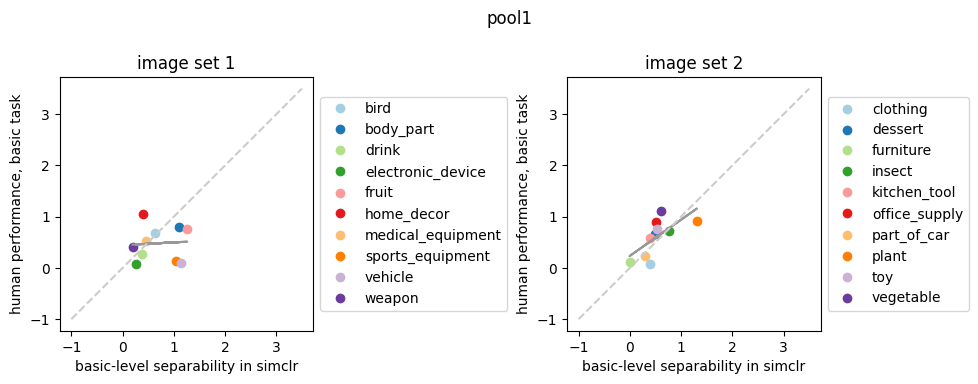

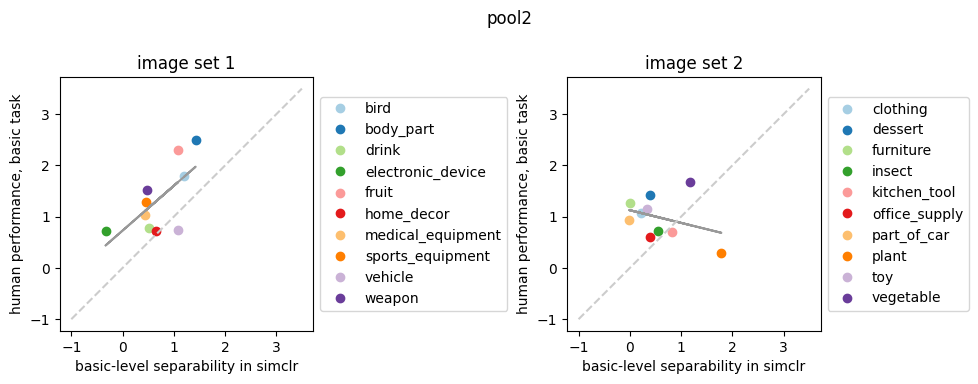

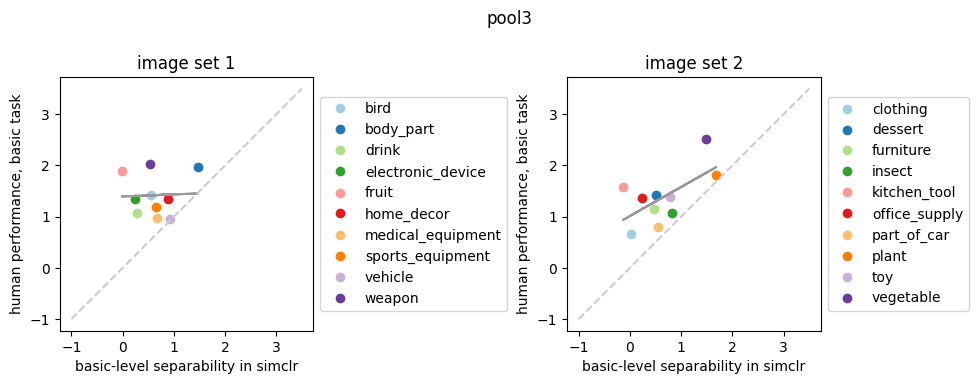

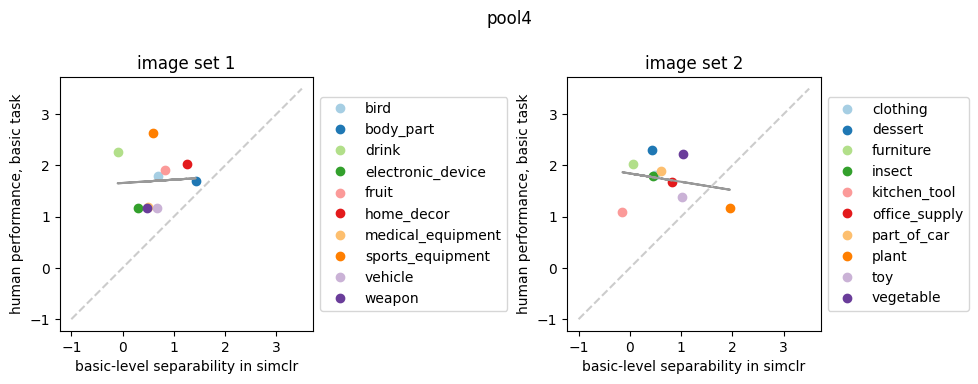

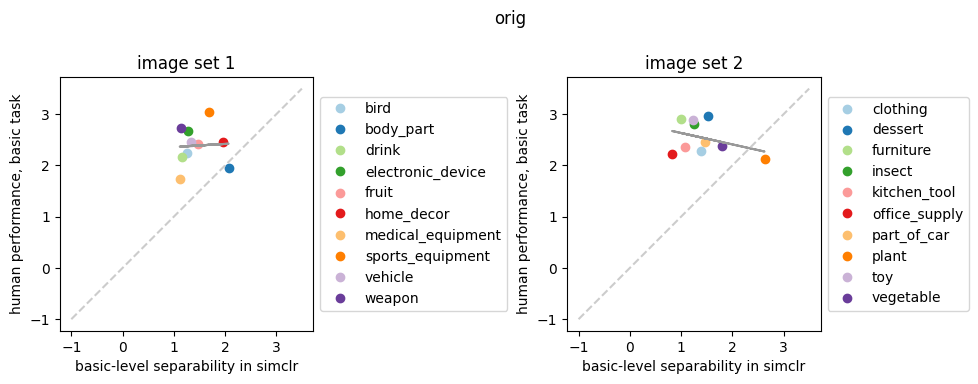

In [13]:
for ii in range(5):
    
    plt.figure(figsize=(12,4))

    lims = [-1, 3.5]

    pi=0
    # pi = 1
    for cbi in [0,1]:

        pi+=1
        ax = plt.subplot(1,2,pi)

        supnames = super_names[super_cbinds==cbi]

        # overall performance at basic-level classification, within supcat
        dist1 = d['dprime_basic_overall'][ii, super_cbinds==cbi]

        cc = 0
        # performance at basic-level classification, for each supcat
        dist2 = np.mean(dprime_by_supcat[cbi][:,cc,ii,:], axis=0)

        assert(np.all(dist1<lims[1]) & np.all(dist1>lims[0]))
        assert(np.all(dist2<lims[1]) & np.all(dist2>lims[0]))

        basic_colors = cm.Paired(np.linspace(0, 1, 12))[0:10,:]
        # markertypes = np.tile(['.','x','^'],4) 
        markertypes = np.tile(['o'],10) 
        allh = []
        # for bi in [9]:
        for bi in range(len(dist1)):

            h, = plt.plot(dist1[bi], dist2[bi], markertypes[bi], color=basic_colors[bi,:], alpha=1)

            allh+=[h]

        xvals = dist1
        yvals = dist2
        yhat, reg_coeffs, r2 = stats_utils.lin_reg(xvals, yvals)
        plt.plot(xvals, yhat, '-', color=[0.6, 0.6, 0.6])

        plt.title('image set %d'%(cbi+1))

        plt.xlabel('basic-level separability in simclr')
        plt.ylabel('human performance, %s task'%cue_level_names[cc])

        plt.xlim(lims)
        plt.ylim(lims)

        plt.plot(lims,lims, color=[0.8, 0.8, 0.8], linestyle='--')

        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])

        plt.axis('square')
        # Put a legend to the right of the current axis
        ax.legend(allh, list(supnames), loc='center left', bbox_to_anchor=(1, 0.5))


    plt.suptitle(image_type_names[ii])

[[0.01961374]
 [0.70920535]] 0.011624796882744315
(0.10781835132640705, 0.1285970316489721)
[[-0.00667281]
 [ 0.76918117]] 0.0013642469528861723
(-0.036935713786067755, 0.6035843275477918)


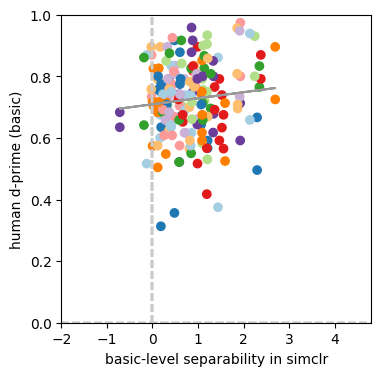

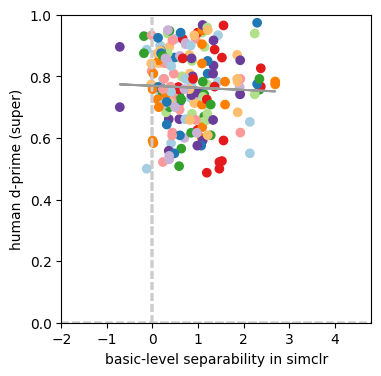

In [32]:
for cc, cue_level in enumerate(cue_level_names):
    
    plt.figure(figsize=(4,4))

    xvals = []; yvals = [];

    for cbi, cb in enumerate([1,2]):

        supnames = super_names[super_cbinds==cbi]

        for sc, supcat in enumerate(supnames):

            # get human performance
            # vals = dprime_by_bascat_combinesubs[cbi,cc,sc,:]
            vals = acc_by_bascat_combinesubs[cbi,cc,sc,:]
            
            # get discriminability in image space
            binds = basic_inds[super_inds_long==sc]
            dist = np.mean(d['dprime_each_bascat'][binds,:], axis=1)

            cmap = cm.Paired(np.linspace(0, 1, 12))[0:10,:]
            plt.scatter(dist, vals, c=cmap)

            xvals+=[dist]
            yvals+=[vals]

            # plt.ylim([-2, 4.8])
            plt.ylim([0, 1])
            plt.xlim([-2, 4.8])
            
            plt.xlabel('basic-level separability in simclr')
            plt.ylabel('human d-prime (%s)'%cue_level)

            plt.axhline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')
            plt.axvline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')

    xvals = np.concatenate(xvals, axis=0)
    yvals = np.concatenate(yvals, axis=0)
    yhat, reg_coeffs, r2 = stats_utils.lin_reg(xvals, yvals)
    plt.plot(xvals, yhat, '-', color=[0.6, 0.6, 0.6])

    print(reg_coeffs, r2)
    print(scipy.stats.pearsonr(xvals, yvals))

[[0.23011052]
 [1.3140986 ]] 0.02278179655625545
[[0.08341665]
 [1.88409523]] 0.002816937094482941


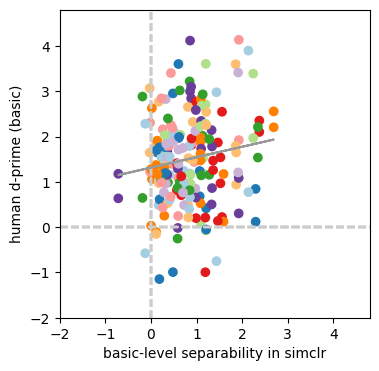

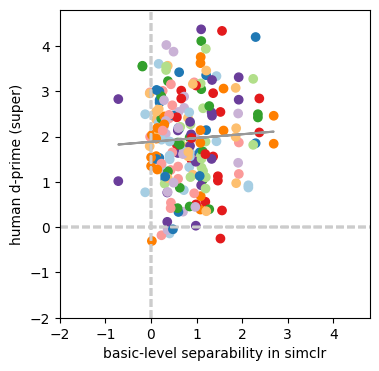

In [12]:
for cc, cue_level in enumerate(cue_level_names):
    
    plt.figure(figsize=(4,4))

    xvals = []; yvals = [];

    for cbi, cb in enumerate([1,2]):

        supnames = super_names[super_cbinds==cbi]

        for sc, supcat in enumerate(supnames):

            # get human performance
            vals = dprime_by_bascat_combinesubs[cbi,cc,sc,:]
            # vals = acc_by_bascat_combinesubs[cbi,cc,sc,:]
            
            # get discriminability in image space
            binds = basic_inds[super_inds_long==sc]
            dist = np.mean(d['dprime_each_bascat'][binds,:], axis=1)

            cmap = cm.Paired(np.linspace(0, 1, 12))[0:10,:]
            plt.scatter(dist, vals, c=cmap)

            xvals+=[dist]
            yvals+=[vals]

            plt.ylim([-2, 4.8])
            # plt.ylim([0, 1])
            plt.xlim([-2, 4.8])
            
            plt.xlabel('basic-level separability in simclr')
            plt.ylabel('human d-prime (%s)'%cue_level)

            plt.axhline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')
            plt.axvline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')

    xvals = np.concatenate(xvals, axis=0)
    yvals = np.concatenate(yvals, axis=0)
    yhat, reg_coeffs, r2 = stats_utils.lin_reg(xvals, yvals)
    plt.plot(xvals, yhat, '-', color=[0.6, 0.6, 0.6])

    print(reg_coeffs, r2)

[[0.04972004]
 [1.52692516]] 0.0035654246354310803
(0.05971117680494223, 0.40096429924570137)


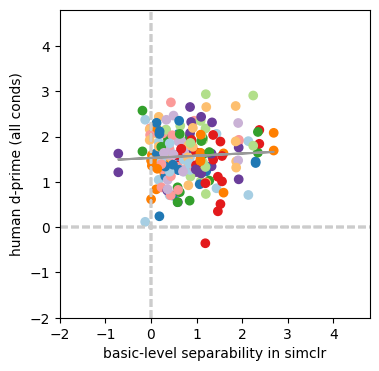

In [33]:
plt.figure(figsize=(4,4))

xvals = []; yvals = [];

for cbi, cb in enumerate([1,2]):

    supnames = super_names[super_cbinds==cbi]

    for sc, supcat in enumerate(supnames):
    
        # get human performance
        # [subjects x cue_levels x image_types x basic_categ]
        vals = dprime_by_bascat[cbi][:,sc,:]
        meanvals = np.mean(vals, axis=0)
       
        # get discriminability in image space
        binds = basic_inds[super_inds_long==sc]
        dist = np.mean(d['dprime_each_bascat'][binds,:], axis=1)

        cmap = cm.Paired(np.linspace(0, 1, 12))[0:10,:]
        plt.scatter(dist, meanvals, c=cmap)
        
        xvals+=[dist]
        yvals+=[meanvals]

        plt.ylim([-2, 4.8])
        plt.xlim([-2, 4.8])
        plt.xlabel('basic-level separability in simclr')
        plt.ylabel('human d-prime (all conds)')
           
        plt.axhline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')
        plt.axvline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')

xvals = np.concatenate(xvals, axis=0)
yvals = np.concatenate(yvals, axis=0)
yhat, reg_coeffs, r2 = stats_utils.lin_reg(xvals, yvals)
plt.plot(xvals, yhat, '-', color=[0.6, 0.6, 0.6])
     
print(reg_coeffs, r2)
print(scipy.stats.pearsonr(xvals, yvals))